In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import clear_output
from pylab import rcParams

In [2]:
# set the size of the plots
rcParams['figure.figsize'] = 15, 12

In [3]:
# constants to represent the sun and earth
a, b = 0.012277471, 0.987722529

# dy/dt = f(t, y)
# t : time
# y : [u1, u1', u2, u2']
# return: [u1', u1'', u2', u2'']
def orbit(t, y):
    p, dpdt, q, dqdt = y
    d1 = ((p+a)**2+q**2)**(3/2)
    d2 = ((p-b)**2+q**2)**(3/2)
    d2pdt2 = p + (2*dqdt) - (b*(p+a)/d1) - (a*(p-b)/d2)
    d2qdt2 = q - (2*dpdt) - (b*q/d1) - (a*q/d2)
    return np.array([dpdt, d2pdt2, dqdt, d2qdt2])

In [4]:
# period of the function
t = (0, 17.1)
y0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])

# our ivp solver
sol = solve_ivp(orbit, t, y0, rtol=1e-6, method='RK45')

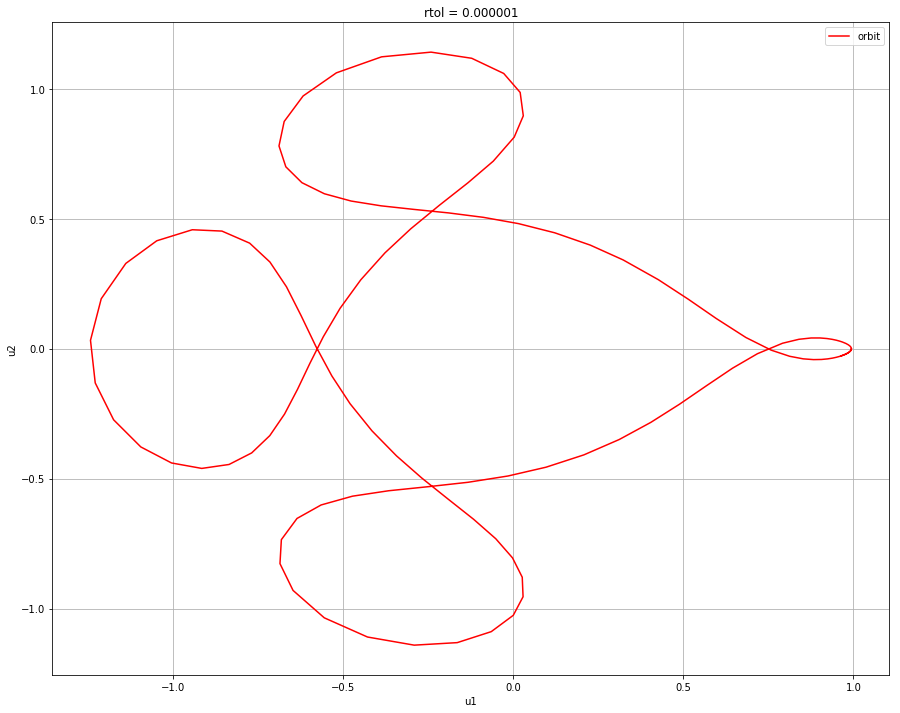

In [5]:
# graph of the orbit with local error tolerance of 1e-6
plt.plot(sol.y[0], sol.y[2], 'red', label='orbit')
plt.title('rtol = %f'%(1e-6))
plt.legend(loc='best')
plt.xlabel('u1')
plt.ylabel('u2')
plt.grid()

#### Graphing the u1 and u2 vs time

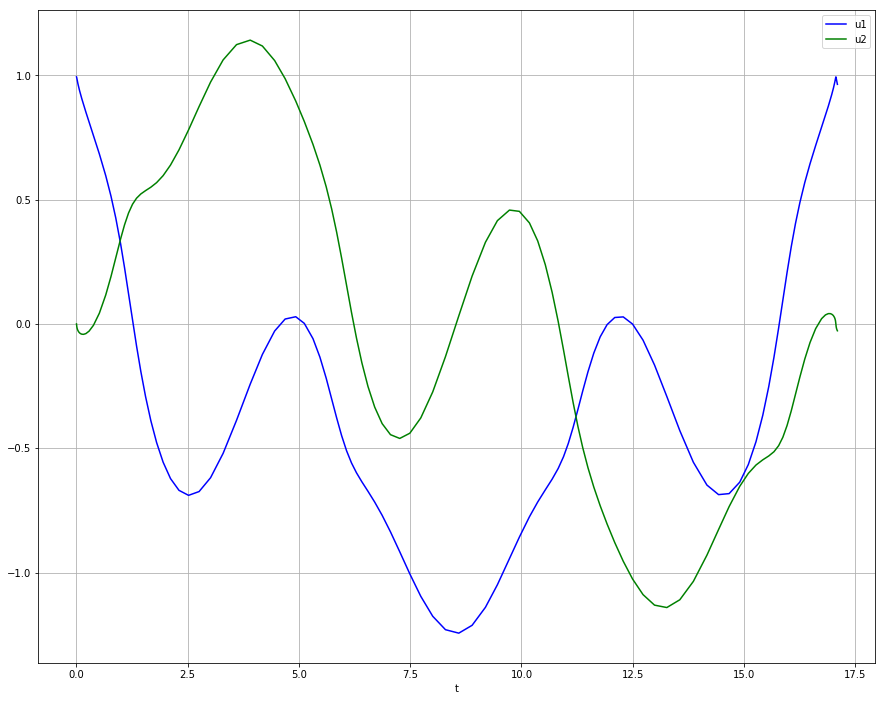

In [6]:
# graph u1 and u2 vs time
plt.plot(sol.t, sol.y[0], 'b', label='u1')
plt.plot(sol.t, sol.y[2], 'g', label='u2')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

#### Graphing the first derivatives

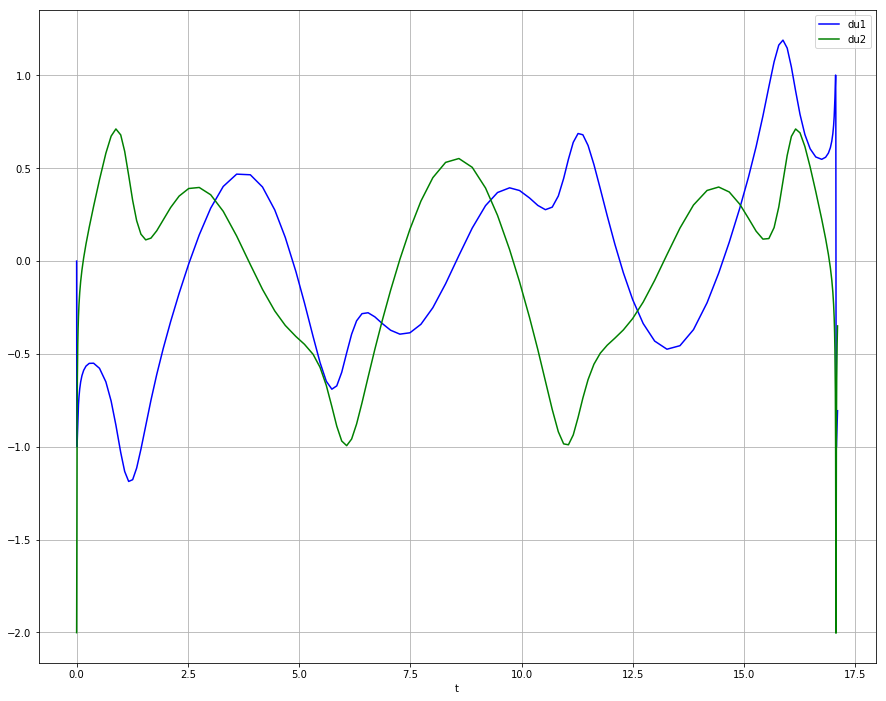

In [7]:
# graph of du/dt vs time
plt.plot(sol.t, sol.y[1], 'b', label='du1')
plt.plot(sol.t, sol.y[3], 'g', label='du2')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

#### Animation: Running the IVP solver while reducing the local error tolerance

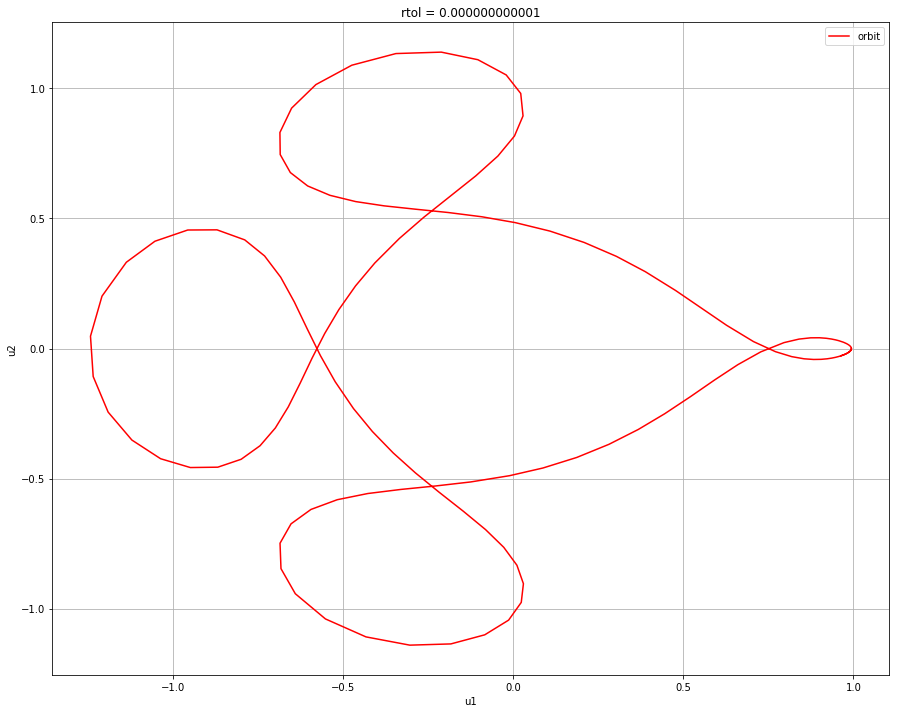

In [10]:
step = []
tols = np.linspace(1e-12, 1e-2, 150)[::-1]
for tol in tols:
    clear_output(wait=True)
    sol = solve_ivp(orbit, t, y0, rtol=tol)
    step.append((tol, len(sol.y[0])))
    plt.plot(sol.y[0], sol.y[2], 'r', label='orbit')
    plt.title('rtol = %.12f' % (tol))
    plt.legend(loc='best')
    plt.xlabel('u1')
    plt.ylabel('u2')
    plt.grid()
    plt.show()

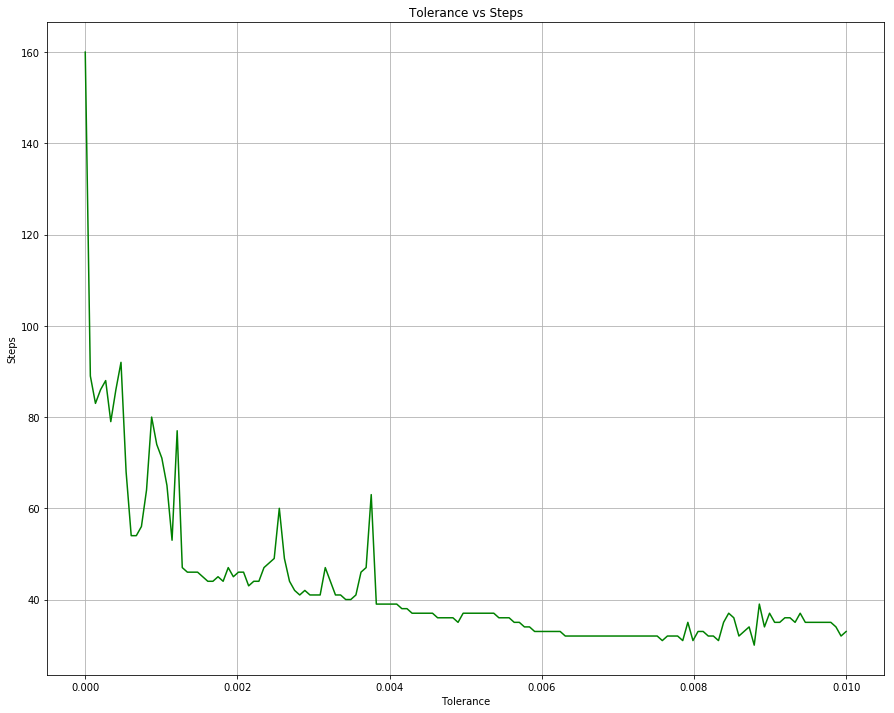

In [35]:
tolerances = [i[0] for i in step]
steps = [i[1] for i in step]
plt.title('Tolerance vs Steps')
plt.xlabel('Tolerance')
plt.ylabel('Steps')
plt.plot(tolerances, steps, 'g')
plt.grid()